# End-Gauge Measurement
## Example H1 from the GUM and GUM-Supplement 1

The example defines numerous input parameters with different distributions.

Note: GUM H1 uses all normal/standard distributions for GUM calculation. Supplement 1 describes distribution
types for Monte-Carlo. This example retains the distribution information as entered into the `typeb` methods.

In [1]:
import suncal

In [2]:
u = suncal.Model('l = d - l_s*(alpha_s*d_theta + d_alpha*theta) + l_s')

# l_s is given as u=.075 @ k=3
u.var('l_s').measure(50000623.6, description='Length of standard at 20C from certificate', units='nm')
u.var('l_s').typeb(name='u_{ls}', unc=75, k=3, degf=18, description='Uncertainty of the standard')

# Variable d has 3 uncertainties...
u.var('d').measure(215, description='Measured difference between end gauges', units='nm')
# First is T-distribution with k=1 uncertainty of 10...
u.var('d').typeb(name='u_{d1}', dist='t', unc=10, conf=.95, degf=5, description='Random effects of comparator')
# Normal with k=3...
u.var('d').typeb(name='u_{d2}', unc=20, k=3, degf=8, description='Systematic effects of comparator')
# and a standard uncertainty.
u.var('d').typeb(name='u_d', std=5.8, degf=24, description='Repeated obeservations')

# theta has 2 uncertainty components.
# Arcsine distribution specified with half-width parameter a, and standard uncertainty
u.var('theta').measure(-0.1, description='Deviation in temperature of test bed from 20C ambient', units='delta_degC')
u.var('theta').typeb(name='u_Delta', dist='arcsine', a=0.5, description='Cyclic variation of temperature in room')
u.var('theta').typeb(name='u_theta', std=0.2, description='Mean temperature of the bed')

# Uniform distribution specified with half-width parameter a
u.var('alpha_s').measure(1.15E-5, description='Coefficient of thermal expansion', units='1/delta_degC')
u.var('alpha_s').typeb(name='u_{alpha_s}', dist='uniform', a=2E-6, description='Thermal expansion coefficient of standard')

# d_alpha and d_theta have Curvilinear Trapezoid distributions, with half-width a and curvature d
u.var('d_alpha').measure(0, description='Difference in expansion coefficients', units='1/delta_degC')
u.var('d_alpha').typeb(name='u_{da}', dist='curvtrap', a=1E-6, d=0.1E-6, degf=50, description='Difference in expansion coefficients')  # Curvilinear Trapezoid (See GUM-S1)

u.var('d_theta').measure(0, description='Difference in temperatures', units='delta_degC')
u.var('d_theta').typeb(name='u_{dt}', dist='curvtrap', a=.05, d=.025, degf=2, description='Difference in temperatures')

report = u.calculate().units(l='nm').report
report

|Function   | Method       | Nominal   | Std. Uncertainty   | 95% Coverage   | k         | Deg. Freedom  |
|----------|------------|---------|------------------|--------------|---------|--------------|
|$l$   | GUM          | 5.0000839e+07 nm  | 32 nm           | ± 68 nm     | 2.122     | 15.8          |
|$l$   | Monte Carlo  | 5.0000839e+07 nm  | 34 nm           | (5.0000772e+07 nm, 5.0000906e+07 nm) | 1.960     | -             |

In [3]:
report.allinputs()

## Input Measurements


|Variable   | Mean      | Std. Uncertainty   | Deg. Freedom   | Description                                           |
|----------|---------|------------------|--------------|------------------------------------------------------|
|$\alpha_{s}$   | 0.0000115 1/Δ°C  | 1.2e-06 1/Δ°C           | inf       | Coefficient of thermal expansion                      |
|$d$   | 215.0 nm  | 9.7 nm           | 26       | Measured difference between end gauges                |
|$d_{\alpha}$   | 0.0 1/Δ°C  | 5.8e-07 1/Δ°C           | 50       | Difference in expansion coefficients                  |
|$d_{\theta}$   | 0.0 Δ°C  | 0.030 Δ°C          | 2.0      | Difference in temperatures                            |
|$l_{s}$   | 5.0000624e+07 nm | 25 nm          | 18      | Length of standard at 20C from certificate            |
|$\theta$   | -0.10 Δ°C | 0.41 Δ°C          | inf      | Deviation in temperature of test bed from 20C ambient |



---

## Uncertainty Budget


|Variable   | Component    | Standard Uncertainty   | Deg. Freedom   | Description                                           |
|----------|------------|----------------------|--------------|------------------------------------------------------|
|$\alpha_{s}$   | -            | -                      | -              | Coefficient of thermal expansion                      |
|-          | u_{alpha_s}  | 1.2e-06 1/Δ°C               | inf       | Thermal expansion coefficient of standard             |
|$d$   | -            | -                      | -              | Measured difference between end gauges                |
|-          | u_{d1}       | 3.9 nm               | 5.0       | Random effects of comparator                          |
|-          | u_{d2}       | 6.7 nm               | 8.0       | Systematic effects of comparator                      |
|-          | u_d          | 5.8 nm               | 24       | Repeated obeservations                                |
|$d_{\alpha}$   | -            | -                      | -              | Difference in expansion coefficients                  |
|-          | u_{da}       | 5.8e-07 1/Δ°C               | 50       | Difference in expansion coefficients                  |
|$d_{\theta}$   | -            | -                      | -              | Difference in temperatures                            |
|-          | u_{dt}       | 0.030 Δ°C              | 2.0      | Difference in temperatures                            |
|$l_{s}$   | -            | -                      | -              | Length of standard at 20C from certificate            |
|-          | u_{ls}       | 25 nm              | 18      | Uncertainty of the standard                           |
|$\theta$   | -            | -                      | -              | Deviation in temperature of test bed from 20C ambient |
|-          | u_Delta      | 0.35 Δ°C              | inf      | Cyclic variation of temperature in room               |
|-          | u_theta      | 0.20 Δ°C              | inf      | Mean temperature of the bed                           |



---

## Sensitivity Coefficients and Proportions


|Variable   | GUM Sensitivity   | GUM Proportion   | MC Sensitivity   | MC Proportion  |
|----------|-----------------|----------------|----------------|---------------|
|$\alpha_{s}$   | 0.0 nm·Δ°C          | 0.00%            | 0.058 nm·Δ°C         | 0.00%          |
|$d$   | 1.0          | 9.09%            | 1.00          | 7.96%          |
|$d_{\alpha}$   | 5.0000624e+06 nm·Δ°C          | 0.82%            | 5.0046289e+06 nm·Δ°C         | 0.72%          |
|$d_{\theta}$   | -575.0 nm/Δ°C          | 29.12%           | 574.9 nm/Δ°C         | 25.53%         |
|$l_{s}$   | 1.0           | 60.97%           | 1.0          | 53.55%         |
|$\theta$   | 0.0 nm/Δ°C         | 0.00%            | 1.7e-07 nm/Δ°C        | 0.00%          |

In [4]:
report.variables.components()

|Variable   | Component    | Standard Uncertainty   | Deg. Freedom   | Description                                           |
|----------|------------|----------------------|--------------|------------------------------------------------------|
|$\alpha_{s}$   | -            | -                      | -              | Coefficient of thermal expansion                      |
|-          | u_{alpha_s}  | 1.2e-06 1/Δ°C               | inf       | Thermal expansion coefficient of standard             |
|$d$   | -            | -                      | -              | Measured difference between end gauges                |
|-          | u_{d1}       | 3.9 nm               | 5.0       | Random effects of comparator                          |
|-          | u_{d2}       | 6.7 nm               | 8.0       | Systematic effects of comparator                      |
|-          | u_d          | 5.8 nm               | 24       | Repeated obeservations                                |
|$d_{\alpha}$   | -            | -                      | -              | Difference in expansion coefficients                  |
|-          | u_{da}       | 5.8e-07 1/Δ°C               | 50       | Difference in expansion coefficients                  |
|$d_{\theta}$   | -            | -                      | -              | Difference in temperatures                            |
|-          | u_{dt}       | 0.030 Δ°C              | 2.0      | Difference in temperatures                            |
|$l_{s}$   | -            | -                      | -              | Length of standard at 20C from certificate            |
|-          | u_{ls}       | 25 nm              | 18      | Uncertainty of the standard                           |
|$\theta$   | -            | -                      | -              | Deviation in temperature of test bed from 20C ambient |
|-          | u_Delta      | 0.35 Δ°C              | inf      | Cyclic variation of temperature in room               |
|-          | u_theta      | 0.20 Δ°C              | inf      | Mean temperature of the bed                           |

In [5]:
report.expanded()

### GUM Approximation


|Function   | Level of Confidence   | Minimum   | Maximum   | k         | Deg. Freedom   | Expanded Uncertainty  |
|----------|---------------------|---------|---------|---------|--------------|----------------------|
|$l$   | 95.00%                | 5.0e+07 nm  | 5.0e+07 nm  | 2.122     | 15.78          | 68 nm              |


### Monte Carlo

Symmetric Coverage Intervals

|Function   | Level of Confidence   | Minimum   | Maximum   | Coverage Factor  |
|----------|---------------------|---------|---------|-----------------|
|$l$   | 95.00%                | 5.0e+07 nm  | 5.0e+07 nm  | 1.960            |

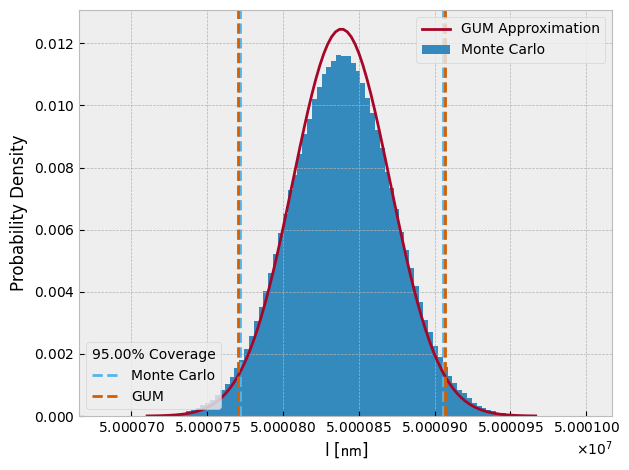

In [6]:
# Compare to GUM-Supplement1 Figure 17
report.plot.pdf(interval=.95);

In [7]:
report.gum.derivation()

### Measurement Model:

$l = d - l_{s} \left(\alpha_{s} d_{\theta} + d_{\alpha} \theta\right) + l_{s}$

### Measured Values:


|Variable   | Std. Uncertainty   | Deg. Freedom  |
|----------|------------------|--------------|
|$\alpha_{s}$   | $u_{\alpha s}$           | $\nu_{\alpha s}$      |
|$d$   | $u_{d}$           | $\nu_{d}$      |
|$d_{\alpha}$   | $u_{d \alpha}$           | $\nu_{d \alpha}$      |
|$d_{\theta}$   | $u_{d \theta}$          | $\nu_{d \theta}$     |
|$l_{s}$  | $u_{l s}$          | $\nu_{l s}$     |
|$\theta$  | $u_{\theta}$          | $\nu_{\theta}$     |


### Combined Uncertainty:

$u_{l} = \sqrt{\alpha_{s}^{2} l_{s}^{2} u_{d \theta}^{2} + d_{\alpha}^{2} l_{s}^{2} u_{\theta}^{2} + d_{\theta}^{2} l_{s}^{2} u_{\alpha s}^{2} + l_{s}^{2} \theta^{2} u_{d \alpha}^{2} + u_{d}^{2} + u_{l s}^{2} \left(- \alpha_{s} d_{\theta} - d_{\alpha} \theta + 1\right)^{2}}$

### Effective degrees of freedom:

$\nu_{l} = \frac{u_{l}^{4}}{\frac{\alpha_{s}^{4} l_{s}^{4} u_{d \theta}^{4}}{\nu_{d \theta}} + \frac{d_{\alpha}^{4} l_{s}^{4} u_{\theta}^{4}}{\nu_{\theta}} + \frac{d_{\theta}^{4} l_{s}^{4} u_{\alpha s}^{4}}{\nu_{\alpha s}} + \frac{l_{s}^{4} \theta^{4} u_{d \alpha}^{4}}{\nu_{d \alpha}} + \frac{u_{l s}^{4} \left(- \alpha_{s} d_{\theta} - d_{\alpha} \theta + 1\right)^{4}}{\nu_{l s}} + \frac{u_{d}^{4}}{\nu_{d}}}$